# データを読み込む

Data 2024とData2025の全エクセルファイルをpandasに読み込み。

In [9]:
import pandas as pd

# Excelファイルのパス
file_path = "./arrenged_2024.xlsx"  # 適宜変更

# すべてのシートをヘッダーなしで読み込み
sheet_dfs_raw = pd.read_excel(file_path, sheet_name=None, header=None)

# 整形されたデータを格納する辞書
cleaned_tables = {}

# ヘッダー処理はそのまま
for sheet_name, df_raw in sheet_dfs_raw.items():
    header = df_raw.iloc[0].tolist()
    df_data = df_raw.iloc[1:].reset_index(drop=True)

    records = []

    # League average（2行目）
    league_avg = [df_data.iloc[0, 0]] + df_data.iloc[0, 1:].tolist()
    records.append(league_avg)

    # 残りは 2行ずつ（数値行 → チーム名行）
    for i in range(1, len(df_data) - 1, 2):
        team_name = df_data.iloc[i + 1, 0]  # チーム名
        values = df_data.iloc[i, 1:].tolist()  # 数値（1列目は #UNKNOWN! なので除外）
        records.append([team_name] + values)

    # DataFrame 化
    df_cleaned = pd.DataFrame(records, columns=header)
    cleaned_tables[sheet_name] = df_cleaned

# 例：PPDA against を表示
cleaned_tables["xGA"]

,Team,xGA,Goals conceded,xG per shot against
0,League average,53.09,50.65,0.120
1,Júbilo Iwata,73.24,68.00,0.137
2,Sagan Tosu,71.09,68.00,0.126
3,Consadole Sapporo,68.10,66.00,0.136
4,Kyoto Sanga,63.11,55.00,0.119
5,Kawasaki Frontale,60.56,57.00,0.131
6,Yokohama F. Marinos,56.93,62.00,0.102
7,Albirex Niigata,53.76,59.00,0.122
8,Shonan Bellmare,53.55,58.00,0.114
9,Cerezo Osaka,52.60,48.00,0.118


In [12]:
# 出力先ファイル（元ファイルを残したい場合は別名にする）
output_path = "./arrenged_2024_cleaned.xlsx"

# ExcelWriter で新しいブックを開き、各 DataFrame をシートごとに保存
# 既定のエンジン (openpyxl) が入っていれば engine 指定は不要
# なければ `pip install openpyxl` か `pip install xlsxwriter` を先に実行してください
with pd.ExcelWriter(output_path, engine="openpyxl") as writer:  # または engine="xlsxwriter"
    for sheet_name, df in cleaned_tables.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"✅ クリーニング結果を {output_path} に保存しました")


✅ クリーニング結果を ./arrenged_2024_cleaned.xlsx に保存しました


### チーム名を日本語変換

In [10]:
team_translation = {
    'Kashiwa Reysol': '柏',
    'Yokohama F. Marinos': '横浜FM',
    'Vissel Kobe': '神戸',
    'Sanfrecce Hiroshima': '広島',
    'Cerezo Osaka': 'C大阪',
    'Urawa Reds': '浦和',
    'Kawasaki Frontale': '川崎',
    'Albirex Niigata': '新潟',
    'Shimizu S-Pulse': '清水',
    'Machida Zelvia': '町田',
    'Kyoto Sanga': '京都',
    'Gamba Osaka': 'G大阪',
    'Tokyo': 'FC東京',
    'Tokyo Verdy': '東京V',
    'Nagoya Grampus': '名古屋',
    'Shonan Bellmare': '湘南',
    'Yokohama': '横浜FC',
    'Kashima Antlers': '鹿島',
    'Avispa Fukuoka': '福岡',
    'Fagiano Okayama': '岡山',
    'Júbilo Iwata': '磐田',
    'Consadole Sapporo': '札幌',
    'Sagan Tosu': '鳥栖',
    'League average': 'リーグ平均',
}

# teams カラムを日本語に変換
for key, df in cleaned_tables.items():  
    df['Team'] = df['Team'].replace(team_translation)

#　変換後のチーム名を確認
sheet_name = list(cleaned_tables.keys())[0]  # 最初のシート
print("変換後のチーム名:")
print(cleaned_tables[sheet_name]['Team'].tolist())


変換後のチーム名:
['リーグ平均', 'C大阪', '新潟', '横浜FM', '川崎', '札幌', 'G大阪', '柏', '浦和', 'FC東京', '鹿島', '湘南', '神戸', '広島', '京都', '町田', '鳥栖', '福岡', '東京V', '磐田', '名古屋']


# 全体傾向

## XG vs XGA

xGデータを読み込み中...
xGAデータを読み込み中...
xG列名: ['Team', 'xG', 'Goals', 'xG per shot']
xGA列名: ['Team', 'xGA', 'Goals conceded', 'xG per shot against']
使用するxG列: xG
使用するxGA列: xGA
\n統合データ: 20チーム
\n=== xG per game vs xGA per game データ ===
チーム名\t\txG/試合\txGA/試合\t試合数
--------------------------------------------------
C大阪         \t 1.549\t  1.459\t  20試合
川崎          \t 1.532\t  1.130\t  18試合
広島          \t 1.367\t  0.875\t  19試合
名古屋         \t 1.326\t  1.213\t  19試合
町田          \t 1.314\t  0.934\t  19試合
新潟          \t 1.282\t  1.301\t  18試合
G大阪         \t 1.277\t  1.126\t  19試合
鹿島          \t 1.255\t  1.177\t  19試合
FC東京        \t 1.249\t  1.440\t  18試合
清水          \t 1.199\t  1.290\t  19試合
岡山          \t 1.177\t  1.242\t  19試合
京都          \t 1.172\t  1.336\t  20試合
神戸          \t 1.170\t  1.084\t  18試合
浦和          \t 1.113\t  1.343\t  21試合
湘南          \t 1.104\t  1.365\t  19試合
福岡          \t 1.084\t  1.117\t  19試合
柏           \t 1.073\t  1.173\t  19試合
横浜FC        \t 0.994\t  1.061\t  19試合
横浜FM        \t 

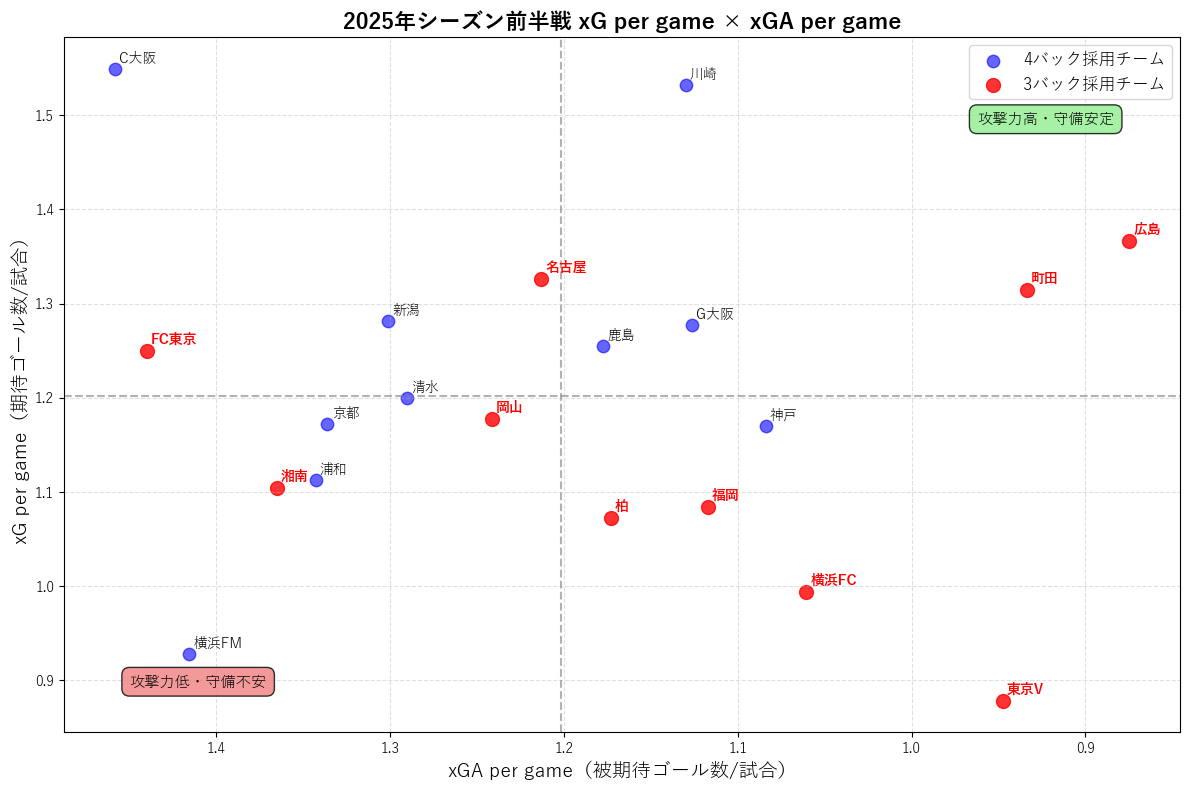

\n=== 戦術分析結果 ===
3バック採用チーム（10チーム）:
- 平均xG per game: 1.157
- 平均xGA per game: 1.137
\n4バック採用チーム（10チーム）:
- 平均xG per game: 1.248
- 平均xGA per game: 1.266
\nリーグ全体平均:
- xG per game: 1.202
- xGA per game: 1.201


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import pandas as pd

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# 試合数データ
match_data = {
    "鹿島": 19,
    "広島": 19,
    "京都": 20, 
    "浦和": 21,
    "柏": 19,
    "神戸": 18,
    "川崎": 18,
    "C大阪": 20,
    "清水": 19,
    "町田": 19,
    "岡山": 19,
    "G大阪": 19,
    "東京V": 19,
    "名古屋": 19,
    "福岡": 19,
    "湘南": 19,  
    "横浜FC": 19,
    "FC東京": 18,
    "新潟": 18,
    "横浜FM": 18
}

# 3バック採用チーム
highlight_teams_3back = ["町田", "広島", "東京V", "FC東京", "名古屋", "福岡", "湘南", "柏", "岡山", "横浜FC"]

def create_xg_xga_scatter_per90(file_path):
    """
    xG vs xGA の散布図を作成（Per 90分・3バック vs 4バック）
    """
    try:
        # xGデータ読み込み
        print("xGデータを読み込み中...")
        df_xg = pd.read_excel(file_path, sheet_name='xG')
        df_xg.columns = df_xg.columns.str.replace('\xa0', ' ').str.strip()
        df_xg = df_xg[df_xg['Team'] != 'リーグ平均'].copy()
        
        # xGAデータ読み込み
        print("xGAデータを読み込み中...")
        df_xga = pd.read_excel(file_path, sheet_name='xGA')
        df_xga.columns = df_xga.columns.str.replace('\xa0', ' ').str.strip()
        df_xga = df_xga[df_xga['Team'] != 'リーグ平均'].copy()
        
        print(f"xG列名: {list(df_xg.columns)}")
        print(f"xGA列名: {list(df_xga.columns)}")
        
        # xG列とxGA列を特定
        xg_col = None
        xga_col = None
        
        for col in df_xg.columns:
            if 'xG' in col and 'per' not in col.lower():
                xg_col = col
                break
                
        for col in df_xga.columns:
            if 'xGA' in col:
                xga_col = col
                break
        
        print(f"使用するxG列: {xg_col}")
        print(f"使用するxGA列: {xga_col}")
        
        # 試合数を追加してPer 90分計算
        df_xg['matches'] = df_xg['Team'].map(match_data)
        df_xga['matches'] = df_xga['Team'].map(match_data)
        
        # Per 90分（1試合あたり）計算
        df_xg['xG per game'] = df_xg[xg_col] / df_xg['matches']
        df_xga['xGA per game'] = df_xga[xga_col] / df_xga['matches']
        
        # データ結合
        df_merged = df_xg[['Team', 'xG per game', 'matches']].merge(
            df_xga[['Team', 'xGA per game']], on='Team', how='inner'
        )
        
        print(f"\\n統合データ: {len(df_merged)}チーム")
        print("\\n=== xG per game vs xGA per game データ ===")
        print("チーム名\\t\\txG/試合\\txGA/試合\\t試合数")
        print("-" * 50)
        
        # データ表示（xG per game降順）
        df_sorted = df_merged.sort_values('xG per game', ascending=False)
        for _, row in df_sorted.iterrows():
            print(f"{row['Team']:<12}\\t{row['xG per game']:>6.3f}\\t{row['xGA per game']:>7.3f}\\t{row['matches']:>4}試合")
        
        # 図の設定
        plt.figure(figsize=(12, 8))
        
        # 通常のチーム（4バック - 青）
        df_4back = df_merged[~df_merged["Team"].isin(highlight_teams_3back)]
        plt.scatter(df_4back["xGA per game"], df_4back["xG per game"], 
                   color='blue', alpha=0.6, s=80, label="4バック採用チーム")
        
        # 3バック採用チーム（赤）
        df_3back = df_merged[df_merged["Team"].isin(highlight_teams_3back)]
        plt.scatter(df_3back["xGA per game"], df_3back["xG per game"], 
                   color='red', alpha=0.8, s=100, label="3バック採用チーム")
        
        # チーム名ラベル
        texts = []
        for i, row in df_merged.iterrows():
            color = "red" if row["Team"] in highlight_teams_3back else "black"
            fontweight = "bold" if row["Team"] in highlight_teams_3back else "normal"
            text = plt.annotate(row["Team"], 
                               (row["xGA per game"], row["xG per game"]), 
                               xytext=(3, 3), textcoords='offset points',
                               fontsize=10, ha="left", va="bottom", 
                               color=color, fontweight=fontweight)
            texts.append(text)
        
        # # ラベル位置自動調整
        # adjust_text(texts, 
        #             arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5, lw=0.5),
        #             expand_points=(1.2, 1.2))
        
        # 平均線を追加
        plt.axhline(y=df_merged["xG per game"].mean(), color='gray', linestyle='--', alpha=0.6, linewidth=1.5)
        plt.axvline(x=df_merged["xGA per game"].mean(), color='gray', linestyle='--', alpha=0.6, linewidth=1.5)
        
        # 象限ラベルを追加
        x_min, x_max = df_merged["xGA per game"].min(), df_merged["xGA per game"].max()
        y_min, y_max = df_merged["xG per game"].min(), df_merged["xG per game"].max()
        
        # 象限の説明テキスト
        # plt.text(x_max - (x_max-x_min)*0.05, y_max - (y_max-y_min)*0.08, 
        #          "攻撃力高・守備不安", ha="right", va="center", fontsize=11,
        #          bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
        
        plt.text(x_min + (x_max-x_min)*0.15, y_max - (y_max-y_min)*0.08, 
                 "攻撃力高・守備安定", ha="left", va="center", fontsize=11,
                 bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
        
        plt.text(x_max - (x_max-x_min)*0.15, y_min + (y_max-y_min)*0.03, 
                 "攻撃力低・守備不安", ha="right", va="center", fontsize=11,
                 bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
        
        # plt.text(x_min + (x_max-x_min)*0.05, y_min + (y_max-y_min)*0.04, 
        #          "攻撃力低・守備安定", ha="left", va="center", fontsize=11,
        #          bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
        
        # 軸ラベルとタイトル
        plt.xlabel("xGA per game（被期待ゴール数/試合）", fontsize=14)
        plt.ylabel("xG per game（期待ゴール数/試合）", fontsize=14)
        plt.title("2025年シーズン前半戦 xG per game × xGA per game", 
                  fontsize=16, fontweight='bold')
        
        # グリッドと凡例
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.legend(loc='upper right', fontsize=12)
        
        # 軸の範囲調整
        x_margin = (x_max - x_min) * 0.05
        y_margin = (y_max - y_min) * 0.05
        plt.xlim(x_min - x_margin, x_max + x_margin)
        plt.ylim(y_min - y_margin, y_max + y_margin)
        plt.gca().invert_xaxis()
        plt.tight_layout()
        plt.show()
        
        # 戦術分析結果を表示
        print("\\n=== 戦術分析結果 ===")
        print(f"3バック採用チーム（{len(df_3back)}チーム）:")
        print(f"- 平均xG per game: {df_3back['xG per game'].mean():.3f}")
        print(f"- 平均xGA per game: {df_3back['xGA per game'].mean():.3f}")
        
        print(f"\\n4バック採用チーム（{len(df_4back)}チーム）:")
        print(f"- 平均xG per game: {df_4back['xG per game'].mean():.3f}")
        print(f"- 平均xGA per game: {df_4back['xGA per game'].mean():.3f}")
        
        print(f"\\nリーグ全体平均:")
        print(f"- xG per game: {df_merged['xG per game'].mean():.3f}")
        print(f"- xGA per game: {df_merged['xGA per game'].mean():.3f}")
        
        return df_merged
        
    except Exception as e:
        print(f"エラー: {e}")
        return None

# 実行
file_path = 'arrenged_2025_cleaned.xlsx'
df_result = create_xg_xga_scatter_per90(file_path)

## ポゼッション vs PPDA

データ読み込み開始...
Possessionデータを読み込み中...
Possession列名: ['Team', 'Ball possession']
Possessionデータサンプル:
   Team  Ball possession
1     柏             59.3
2   C大阪             54.2
3  横浜FM             54.1
4    神戸             53.3
5    湘南             52.3

PPDAデータを読み込み中...
PPDA列名: ['Team', 'PPDA']
PPDAデータサンプル:
   Team   PPDA
1    新潟  14.30
2    川崎  13.12
3    浦和  13.07
4  横浜FC  12.96
5    清水  12.86

結合後のデータ: 20チーム
結合後の列名: ['Team', 'Ball possession', 'PPDA']

グラフ作成開始...

使用する列: ポゼッション=Ball possession, PPDA=PPDA


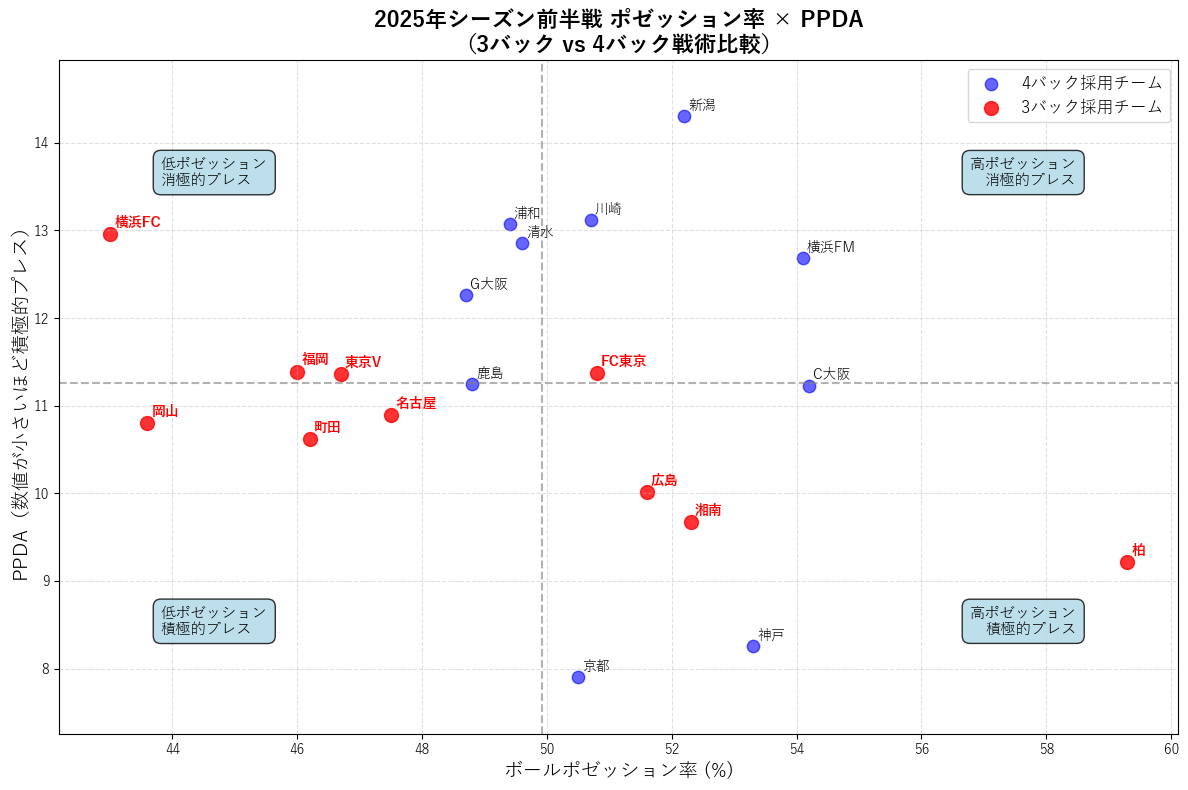


=== 戦術分析結果 ===
3バック採用チーム（10チーム）:
  柏: ポゼッション59.3%, PPDA9.22
  湘南: ポゼッション52.3%, PPDA9.67
  広島: ポゼッション51.6%, PPDA10.01
  FC東京: ポゼッション50.8%, PPDA11.37
  名古屋: ポゼッション47.5%, PPDA10.89
  東京V: ポゼッション46.7%, PPDA11.36
  町田: ポゼッション46.2%, PPDA10.62
  福岡: ポゼッション46.0%, PPDA11.39
  岡山: ポゼッション43.6%, PPDA10.80
  横浜FC: ポゼッション43.0%, PPDA12.96
- 平均ポゼッション率: 48.7%
- 平均PPDA: 10.83

4バック採用チーム（10チーム）:
- 平均ポゼッション率: 51.1%
- 平均PPDA: 11.69

リーグ全体平均:
- ポゼッション率: 49.9%
- PPDA: 11.26


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from adjustText import adjust_text

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# 3バック採用チーム
highlight_teams_3back = ["町田", "広島", "東京V", "FC東京", "名古屋", "福岡", "湘南", "柏", "岡山", "横浜FC"]

def load_and_merge_data(file_path):
    """
    ExcelファイルからPossessionとPPDAデータを読み込んで結合
    """
    try:
        # Possessionデータを読み込み
        print("Possessionデータを読み込み中...")
        df_possession = pd.read_excel(file_path, sheet_name='Possession')
        df_possession.columns = df_possession.columns.str.replace('\xa0', ' ').str.strip()
        df_possession = df_possession[df_possession['Team'] != 'リーグ平均'].copy()
        print(f"Possession列名: {list(df_possession.columns)}")
        print(f"Possessionデータサンプル:\n{df_possession.head()}")
        
        # PPDAデータを読み込み
        print("\nPPDAデータを読み込み中...")
        df_ppda = pd.read_excel(file_path, sheet_name='PPDA')
        df_ppda.columns = df_ppda.columns.str.replace('\xa0', ' ').str.strip()
        df_ppda = df_ppda[df_ppda['Team'] != 'リーグ平均'].copy()
        print(f"PPDA列名: {list(df_ppda.columns)}")
        print(f"PPDAデータサンプル:\n{df_ppda.head()}")
        
        # データを結合
        df_merged = df_possession.merge(df_ppda, on="Team", how="inner")
        print(f"\n結合後のデータ: {len(df_merged)}チーム")
        print(f"結合後の列名: {list(df_merged.columns)}")
        
        return df_merged
        
    except Exception as e:
        print(f"データ読み込みエラー: {e}")
        return pd.DataFrame()

def create_possession_ppda_plot(df):
    """
    ポゼッション vs PPDA の散布図を作成（3バック vs 4バック）
    """
    if df.empty:
        print("データが空です")
        return
    
    # 列名を動的に検出
    possession_col = None
    ppda_col = None
    
    for col in df.columns:
        if 'possession' in col.lower() and possession_col is None:
            possession_col = col
        if 'ppda' in col.lower() and ppda_col is None:
            ppda_col = col
    
    print(f"\n使用する列: ポゼッション={possession_col}, PPDA={ppda_col}")
    
    if possession_col is None or ppda_col is None:
        print("必要な列が見つかりません")
        return
    
    # 図の設定
    plt.figure(figsize=(12, 8))
    
    # 通常のチーム（4バック - 青）
    df_4back = df[~df["Team"].isin(highlight_teams_3back)]
    plt.scatter(df_4back[possession_col], df_4back[ppda_col], 
               color='blue', alpha=0.6, s=80, label="4バック採用チーム")
    
    # 3バック採用チーム（赤）
    df_3back = df[df["Team"].isin(highlight_teams_3back)]
    plt.scatter(df_3back[possession_col], df_3back[ppda_col], 
               color='red', alpha=0.8, s=100, label="3バック採用チーム")
    
    # チーム名ラベル
    texts = []
    for i, row in df.iterrows():
        color = "red" if row["Team"] in highlight_teams_3back else "black"
        fontweight = "bold" if row["Team"] in highlight_teams_3back else "normal"
        text = plt.annotate(row["Team"], 
                           (row[possession_col], row[ppda_col]), 
                           xytext=(3, 3), textcoords='offset points',
                           fontsize=10, ha="left", va="bottom", 
                           color=color, fontweight=fontweight)
        texts.append(text)
    
    # # ラベル位置自動調整
    # adjust_text(texts, 
    #             arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5, lw=0.5),
    #             expand_points=(1.2, 1.2))
    
    # 平均線を追加
    plt.axhline(y=df[ppda_col].mean(), color='gray', linestyle='--', alpha=0.6, linewidth=1.5)
    plt.axvline(x=df[possession_col].mean(), color='gray', linestyle='--', alpha=0.6, linewidth=1.5)
    
    # 象限ラベルを追加
    x_min, x_max = df[possession_col].min(), df[possession_col].max()
    y_min, y_max = df[ppda_col].min(), df[ppda_col].max()
    
    # 象限の説明テキスト
    plt.text(x_max - (x_max-x_min)*0.05, y_min + (y_max-y_min)*0.1, 
             "高ポゼッション\n積極的プレス", ha="right", va="center", fontsize=11, 
             bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
    
    plt.text(x_min + (x_max-x_min)*0.05, y_min + (y_max-y_min)*0.1, 
             "低ポゼッション\n積極的プレス", ha="left", va="center", fontsize=11,
             bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
    
    plt.text(x_max - (x_max-x_min)*0.05, y_max - (y_max-y_min)*0.1, 
             "高ポゼッション\n消極的プレス", ha="right", va="center", fontsize=11,
             bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
    
    plt.text(x_min + (x_max-x_min)*0.05, y_max - (y_max-y_min)*0.1, 
             "低ポゼッション\n消極的プレス", ha="left", va="center", fontsize=11,
             bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
    
    # 軸ラベルとタイトル
    plt.xlabel("ボールポゼッション率 (%)", fontsize=14)
    plt.ylabel("PPDA（数値が小さいほど積極的プレス）", fontsize=14)
    plt.title("2025年シーズン前半戦 ポゼッション率 × PPDA\n（3バック vs 4バック戦術比較）", 
              fontsize=16, fontweight='bold')
    
    # グリッドと凡例
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend(loc='upper right', fontsize=12)
    
    # 軸の範囲調整
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)
    
    plt.tight_layout()
    plt.show()
    
    # 戦術分析結果を表示
    print("\n=== 戦術分析結果 ===")
    print(f"3バック採用チーム（{len(df_3back)}チーム）:")
    for team in df_3back['Team']:
        team_data = df_3back[df_3back['Team'] == team].iloc[0]
        print(f"  {team}: ポゼッション{team_data[possession_col]:.1f}%, PPDA{team_data[ppda_col]:.2f}")
    print(f"- 平均ポゼッション率: {df_3back[possession_col].mean():.1f}%")
    print(f"- 平均PPDA: {df_3back[ppda_col].mean():.2f}")
    
    print(f"\n4バック採用チーム（{len(df_4back)}チーム）:")
    print(f"- 平均ポゼッション率: {df_4back[possession_col].mean():.1f}%")
    print(f"- 平均PPDA: {df_4back[ppda_col].mean():.2f}")
    
    print(f"\nリーグ全体平均:")
    print(f"- ポゼッション率: {df[possession_col].mean():.1f}%")
    print(f"- PPDA: {df[ppda_col].mean():.2f}")

# メイン実行
file_path = 'arrenged_2025_cleaned.xlsx'  # ファイルパスを適宜変更してください

print("データ読み込み開始...")
df_analysis = load_and_merge_data(file_path)

if not df_analysis.empty:
    print("\nグラフ作成開始...")
    create_possession_ppda_plot(df_analysis)
else:
    print("データの読み込みに失敗しました")

# 攻撃面ランキング


✓ xG データ読み込み完了: 20チーム
✓ Touches in PA データ読み込み完了: 20チーム
✓ Key pass データ読み込み完了: 20チーム
✓ Progressive pass データ読み込み完了: 20チーム
✓ Cross データ読み込み完了: 20チーム

=== 列名クリーニング中 ===
xGの列名（クリーニング後）: ['Team', 'xG', 'Goals', 'xG per shot']
Touches in PAの列名（クリーニング後）: ['Team', 'Total', 'Per 90 mins']
Key passの列名（クリーニング後）: ['Team', 'Total', 'Per 90 mins']
Progressive passの列名（クリーニング後）: ['Team', 'Total', 'Per 90 mins', '% accuracy']
Crossの列名（クリーニング後）: ['Team', 'Total', 'Per 90 mins', '% accurate', 'From right flank', 'From left flank', 'To six yard box']

=== xG Per 90分変換中 ===
xG Per 90分変換完了: xG → xG per 90 mins

xG Per 90分 TOP5:
1位: C大阪 - 1.549 (20試合)
2位: 川崎 - 1.532 (18試合)
3位: 広島 - 1.367 (19試合)
4位: 名古屋 - 1.326 (19試合)
5位: 町田 - 1.314 (19試合)

列名クリーニング完了！ランキング作成を開始します。


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\2042217202.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Team", x=value_column,


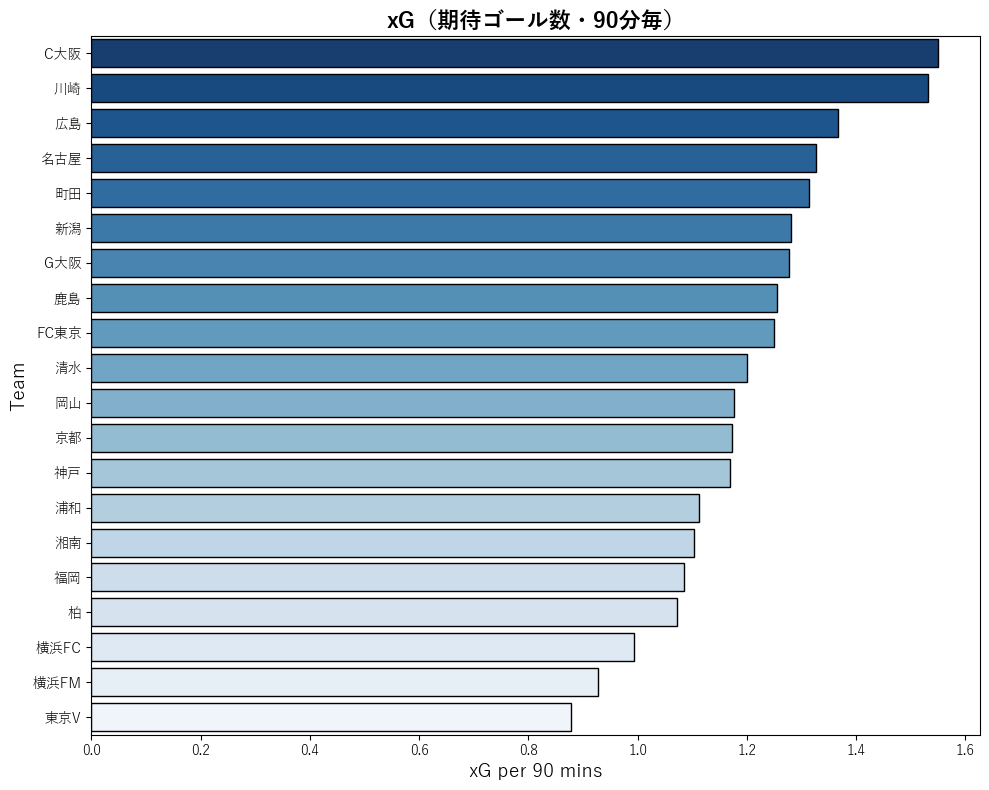


=== xG（期待ゴール数・90分毎） TOP5 ===
1位: C大阪 - 1.5494999999999999
2位: 川崎 - 1.5322222222222222
3位: 広島 - 1.3668421052631579
4位: 名古屋 - 1.3257894736842106
5位: 町田 - 1.3142105263157895


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\2042217202.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Team", x=value_column,


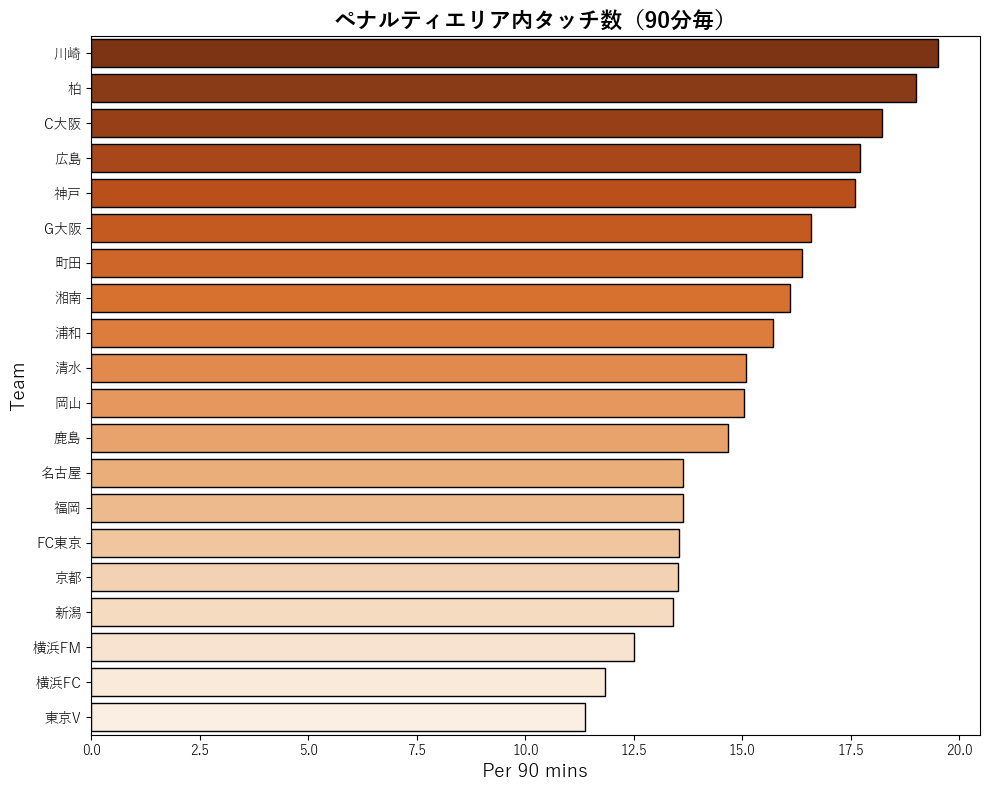


=== ペナルティエリア内タッチ数（90分毎） TOP5 ===
1位: 川崎 - 19.5
2位: 柏 - 19.01
3位: C大阪 - 18.22
4位: 広島 - 17.72
5位: 神戸 - 17.6


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\2042217202.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Team", x=value_column,


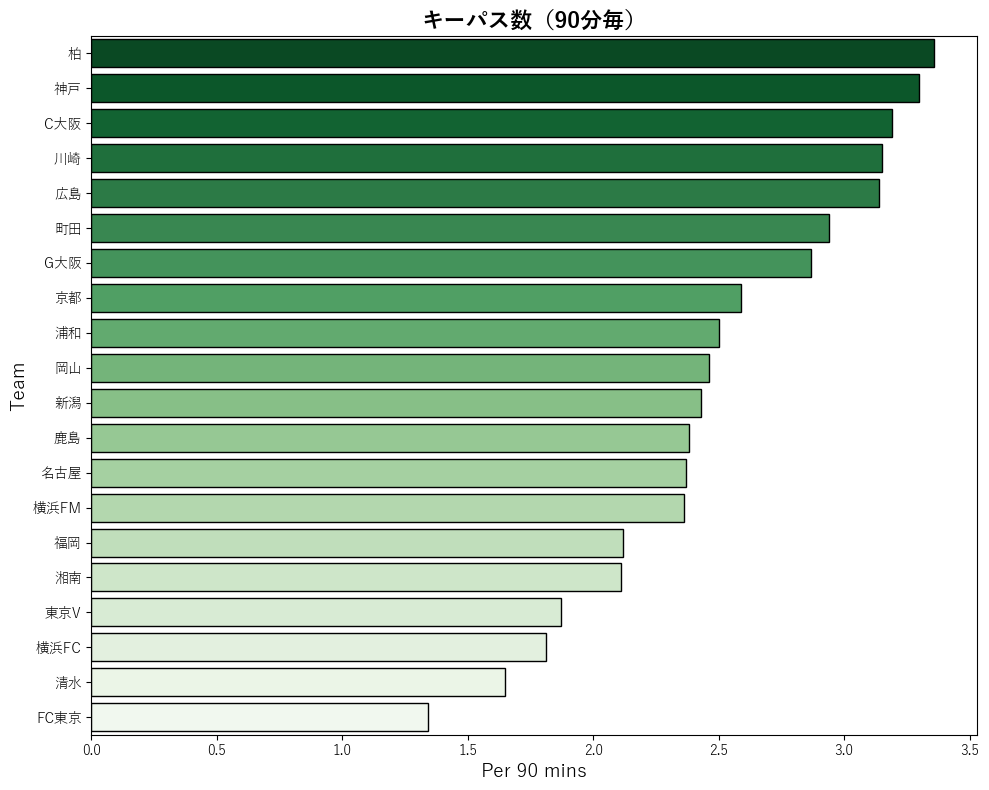


=== キーパス数（90分毎） TOP5 ===
1位: 柏 - 3.36
2位: 神戸 - 3.3
3位: C大阪 - 3.19
4位: 川崎 - 3.15
5位: 広島 - 3.14


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\2042217202.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Team", x=value_column,


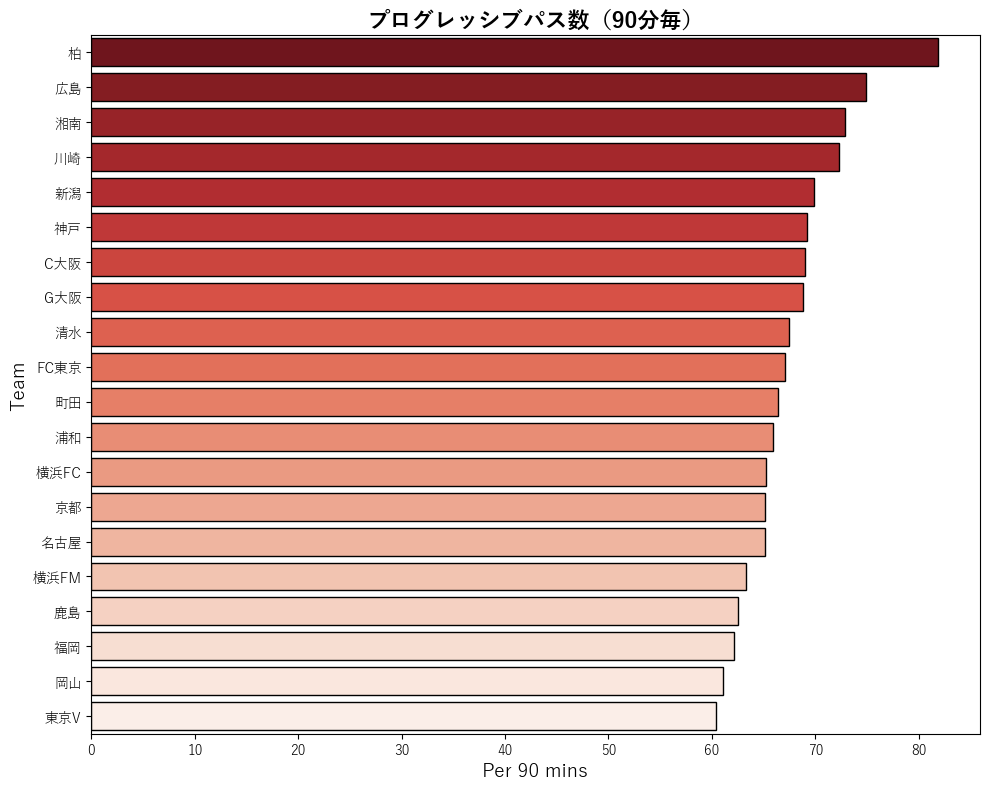


=== プログレッシブパス数（90分毎） TOP5 ===
1位: 柏 - 81.84
2位: 広島 - 74.92
3位: 湘南 - 72.85
4位: 川崎 - 72.3
5位: 新潟 - 69.87


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\2042217202.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Team", x=value_column,


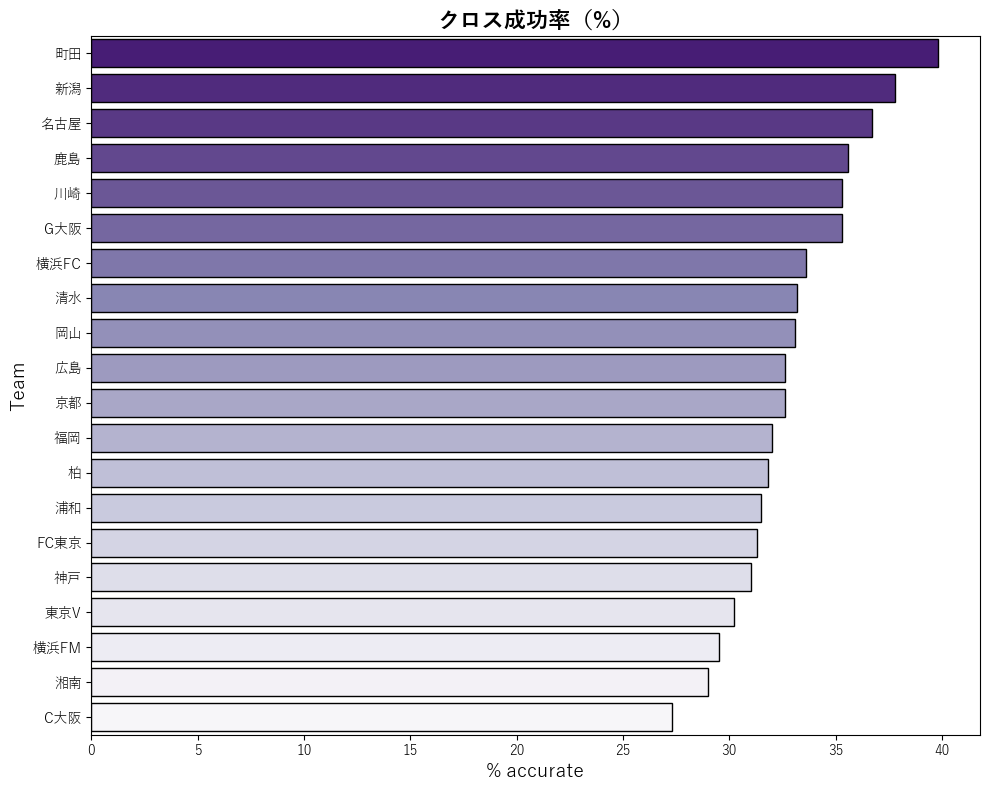


=== クロス成功率（%） TOP5 ===
1位: 町田 - 39.8
2位: 新潟 - 37.8
3位: 名古屋 - 36.7
4位: 鹿島 - 35.6
5位: 川崎 - 35.3


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# Excelファイルからデータを読み込む関数
def load_attack_data(file_path):
    """
    Excelファイルから攻撃面の指標データを読み込む
    """
    dataframes_2025 = {}
    
    # 攻撃面で使用するシート名と対応する列名
    attack_sheets = {
        'xG': (' xG', 'xG（期待ゴール数）'),
        'Touches in PA': ('Per 90 mins', 'ペナルティエリア内タッチ数（90分毎）'),
        'Key pass': ('Per 90 mins', 'キーパス数（90分毎）'),
        'Progressive pass': ('Per 90 mins', 'プログレッシブパス数（90分毎）'),
        'Cross': ('% accurate', 'クロス成功率（%）')
    }
    
    for sheet_name, (value_col, title) in attack_sheets.items():
        try:
            # Excelシートを読み込み
            df = pd.read_excel(file_path, sheet_name=sheet_name)
            
            # リーグ平均行を除外
            df_filtered = df[df['Team'] != 'リーグ平均'].copy()
            
            # データフレームを辞書に保存
            dataframes_2025[sheet_name] = df_filtered
            
            print(f"✓ {sheet_name} データ読み込み完了: {len(df_filtered)}チーム")
            
        except Exception as e:
            print(f"✗ {sheet_name} データ読み込みエラー: {e}")
    
    return dataframes_2025

# Excelファイルを読み込み
file_path = 'arrenged_2025_cleaned.xlsx'  # ファイルパスを適宜変更してください
dataframes_2025 = load_attack_data(file_path)

# 列名のクリーニング（\xa0などの特殊文字を除去）
print("\n=== 列名クリーニング中 ===")
for sheet_name, df in dataframes_2025.items():
    # 列名の特殊文字を除去
    df.columns = df.columns.str.replace('\xa0', ' ').str.strip()
    print(f"{sheet_name}の列名（クリーニング後）: {list(df.columns)}")

# xGデータのPer 90分変換
print("\n=== xG Per 90分変換中 ===")
if 'xG' in dataframes_2025:
    df_xg = dataframes_2025['xG']
    
    # 試合数を追加
    df_xg['matches'] = df_xg['Team'].map(match_data)
    
    # xG列を特定
    xg_col = None
    for col in df_xg.columns:
        if 'xG' in col and 'per' not in col.lower() and 'matches' not in col:
            xg_col = col
            break
    
    if xg_col:
        # Per 90分（1試合あたり）に変換
        df_xg['xG per 90 mins'] = df_xg[xg_col] / df_xg['matches']
        print(f"xG Per 90分変換完了: {xg_col} → xG per 90 mins")
        
        # 結果確認
        print("\nxG Per 90分 TOP5:")
        top5_xg = df_xg.sort_values('xG per 90 mins', ascending=False).head(5)
        for i, (_, row) in enumerate(top5_xg.iterrows(), 1):
            print(f"{i}位: {row['Team']} - {row['xG per 90 mins']:.3f} ({row['matches']}試合)")
    else:
        print("xG列が見つかりませんでした")

print("\n列名クリーニング完了！ランキング作成を開始します。")

# 攻撃面ランキング作成関数
def create_attack_ranking_plot(sheet_name, value_column, title, color_palette='Blues_r'):
    """
    攻撃面ランキングの棒グラフを作成する関数
    """
    df = dataframes_2025[sheet_name].copy()
    
    plt.figure(figsize=(10, 8))
    sns.barplot(data=df, y="Team", x=value_column, 
                palette=color_palette, edgecolor="black",
                order=df.sort_values(value_column, ascending=False)["Team"])
    
    plt.xlabel(value_column, fontsize=14)
    plt.ylabel("Team", fontsize=14) 
    plt.title(title, fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    # TOP5を表示
    top5 = df.sort_values(value_column, ascending=False).head(5)
    print(f"\n=== {title} TOP5 ===")
    for i, (_, row) in enumerate(top5.iterrows(), 1):
        print(f"{i}位: {row['Team']} - {row[value_column]}")

# 5つの攻撃面ランキングを作成

# 1. xG（期待ゴール数）- Per 90分版
create_attack_ranking_plot('xG', 'xG per 90 mins', 'xG（期待ゴール数・90分毎）', 'Blues_r')

# 2. ペナルティエリア内タッチ数
create_attack_ranking_plot('Touches in PA', 'Per 90 mins', 'ペナルティエリア内タッチ数（90分毎）', 'Oranges_r')

# 3. キーパス数  
create_attack_ranking_plot('Key pass', 'Per 90 mins', 'キーパス数（90分毎）', 'Greens_r')

# 4. プログレッシブパス数
create_attack_ranking_plot('Progressive pass', 'Per 90 mins', 'プログレッシブパス数（90分毎）', 'Reds_r')

# 5. クロス成功率
create_attack_ranking_plot('Cross', '% accurate', 'クロス成功率（%）', 'Purples_r')

### 守備面

✓ xGA データ読み込み完了: 20チーム
  列名: ['Team', 'xGA', 'Goals conceded', 'xG per shot against']
✓ PPDA データ読み込み完了: 20チーム
  列名: ['Team', 'PPDA']
✓ Defensive duels データ読み込み完了: 20チーム
  列名: ['Team', 'Total', 'Per 90 mins', '% success']
✓ Interception データ読み込み完了: 20チーム
  列名: ['Team', 'Total', 'Per 90 mins']
✓ Shot Blocked データ読み込み完了: 20チーム
  列名: ['Team', 'Total', 'Per 90 mins', 'Percentage of blocked shots', 'Percentage of blocked shots against']

=== xGA Per 90分変換中 ===
xGA Per 90分変換完了: xGA → xGA per 90 mins

xGA Per 90分 TOP5（数値が小さいほど良い）:
1位: 広島 - 0.875 (19試合)
2位: 町田 - 0.934 (19試合)
3位: 東京V - 0.947 (19試合)
4位: 横浜FC - 1.061 (19試合)
5位: 神戸 - 1.084 (18試合)
=== 守備面ランキング作成開始 ===



C:\Users\arita\AppData\Local\Temp\ipykernel_22292\260759570.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y="Team", x=value_column,


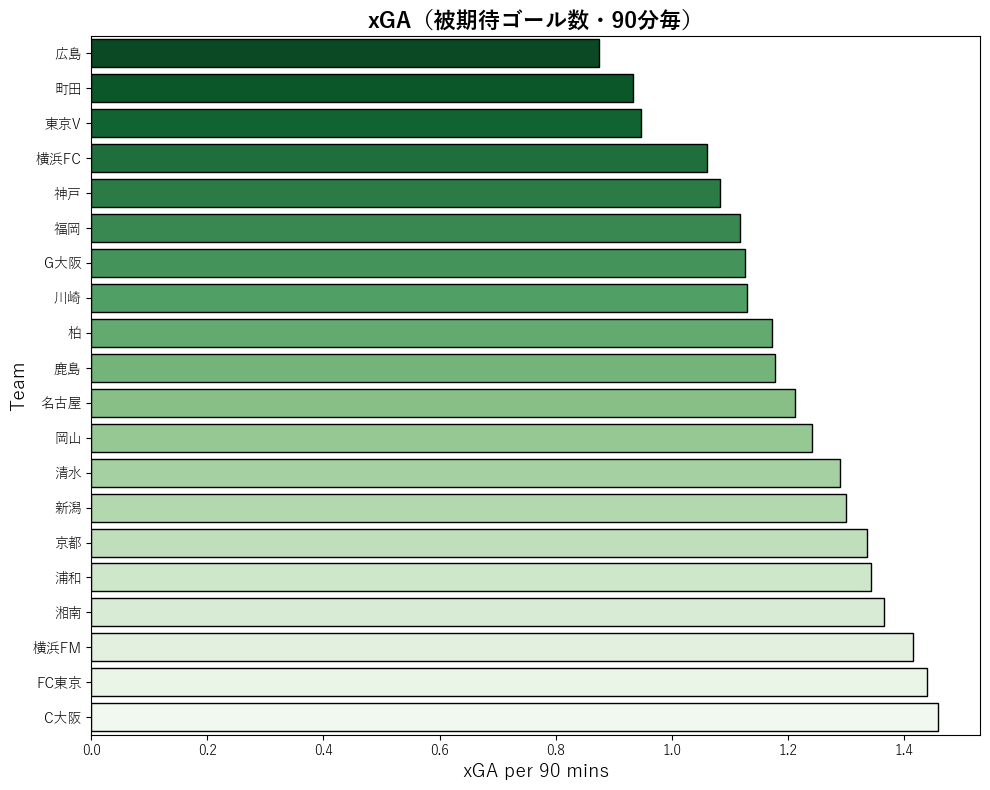


=== xGA（被期待ゴール数・90分毎） TOP5（数値が小さいほど良い） ===
1位: 広島 - 0.8747368421052633
2位: 町田 - 0.9336842105263157
3位: 東京V - 0.9473684210526315
4位: 横浜FC - 1.0605263157894735
5位: 神戸 - 1.083888888888889


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\260759570.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y="Team", x=value_column,


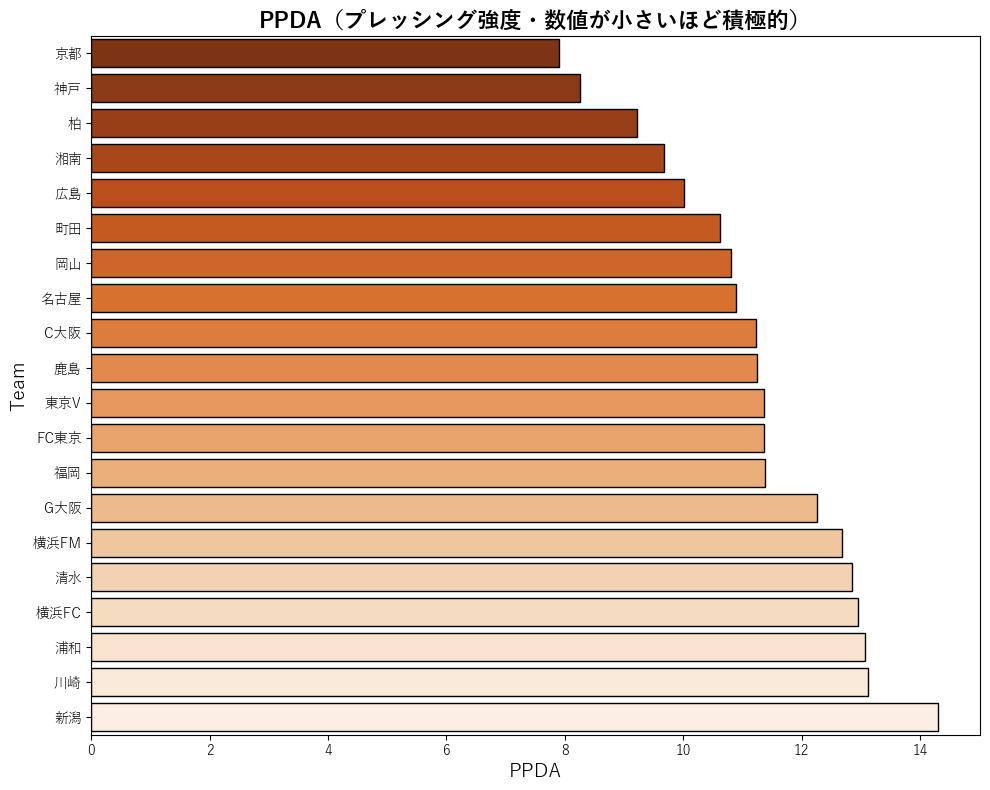


=== PPDA（プレッシング強度・数値が小さいほど積極的） TOP5（数値が小さいほど良い） ===
1位: 京都 - 7.9
2位: 神戸 - 8.26
3位: 柏 - 9.22
4位: 湘南 - 9.67
5位: 広島 - 10.01


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\260759570.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y="Team", x=value_column,


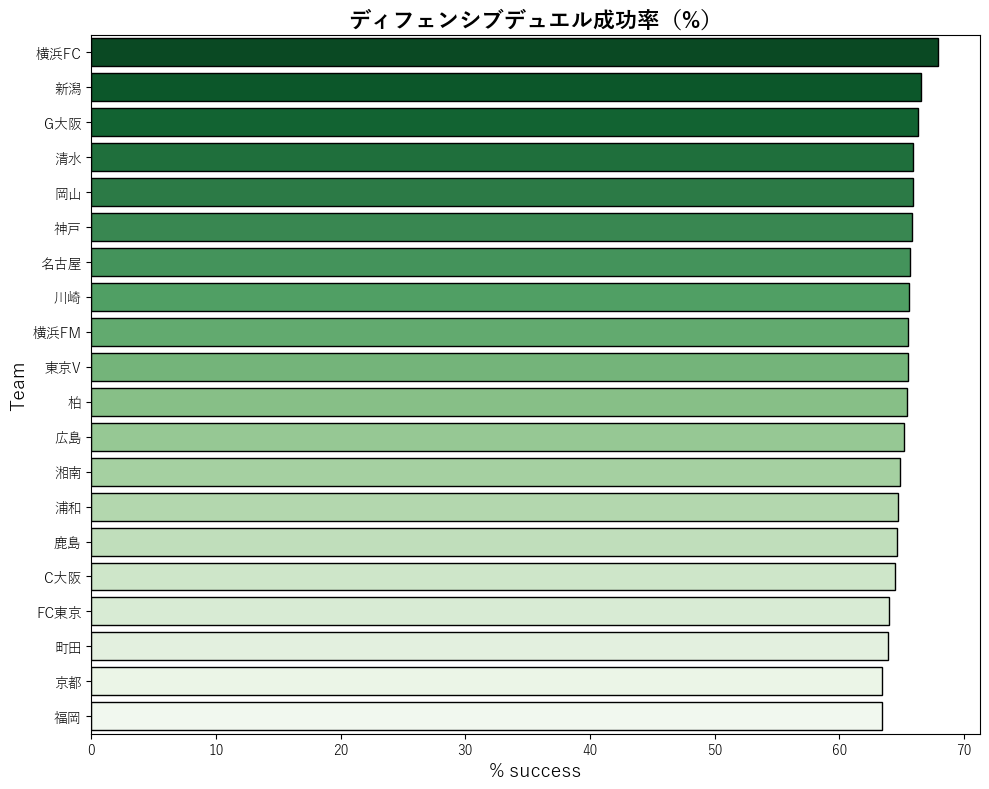


=== ディフェンシブデュエル成功率（%） TOP5 ===
1位: 横浜FC - 67.9
2位: 新潟 - 66.6
3位: G大阪 - 66.3
4位: 清水 - 65.9
5位: 岡山 - 65.9


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\260759570.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y="Team", x=value_column,


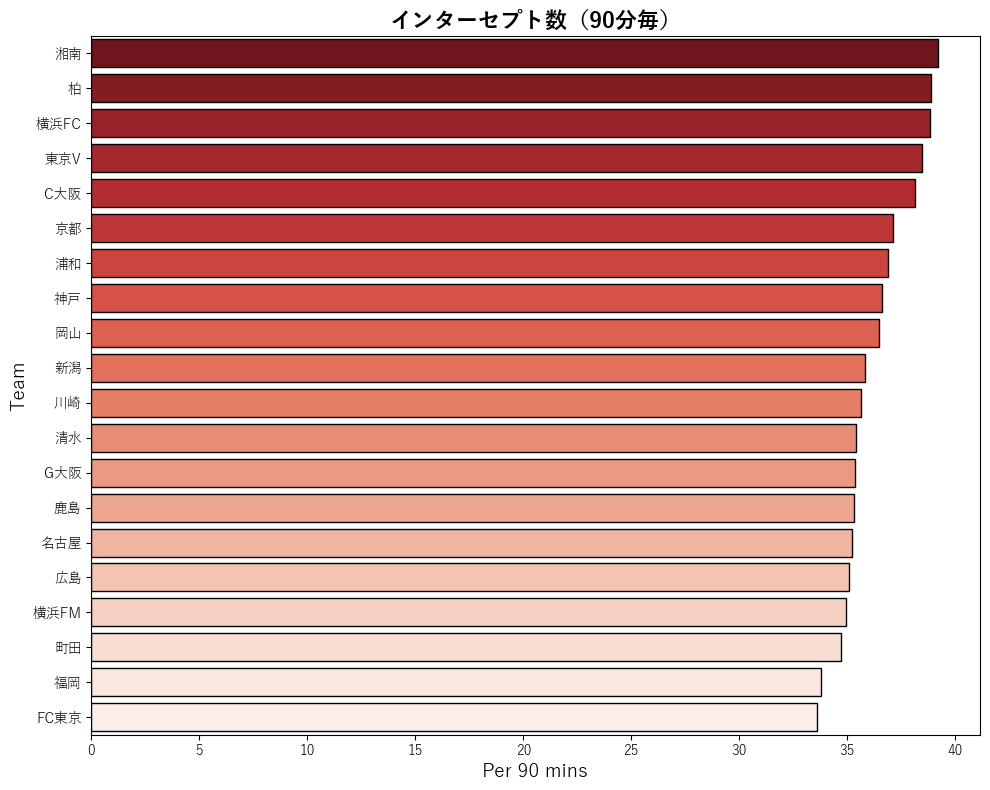


=== インターセプト数（90分毎） TOP5 ===
1位: 湘南 - 39.19
2位: 柏 - 38.88
3位: 横浜FC - 38.84
4位: 東京V - 38.45
5位: C大阪 - 38.14


C:\Users\arita\AppData\Local\Temp\ipykernel_22292\260759570.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, y="Team", x=value_column,


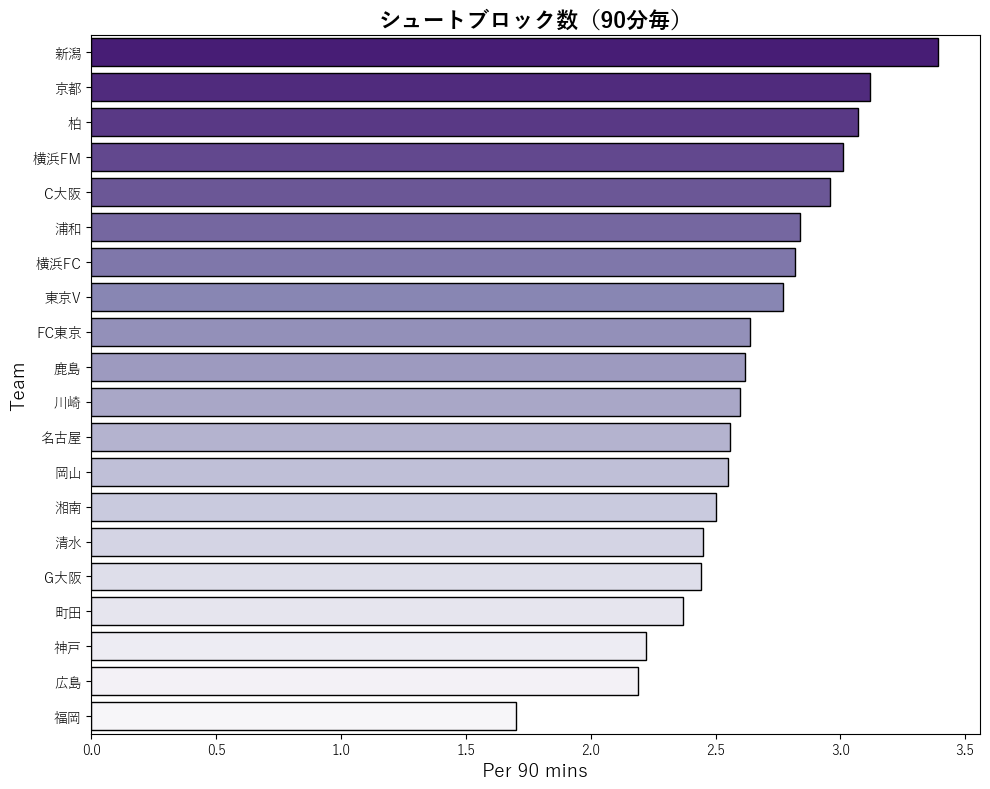


=== シュートブロック数（90分毎） TOP5 ===
1位: 新潟 - 3.39
2位: 京都 - 3.12
3位: 柏 - 3.07
4位: 横浜FM - 3.01
5位: C大阪 - 2.96

=== 守備面ランキング作成完了 ===


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Jupyter Notebookの出力制限を解除
import sys
sys.stdout.write_limit = None

# pandas の表示制限も解除
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# 試合数データ
match_data = {
    "鹿島": 19,
    "広島": 19,
    "京都": 20, 
    "浦和": 21,
    "柏": 19,
    "神戸": 18,
    "川崎": 18,
    "C大阪": 20,
    "清水": 19,
    "町田": 19,
    "岡山": 19,
    "G大阪": 19,
    "東京V": 19,
    "名古屋": 19,
    "福岡": 19,
    "湘南": 19,  
    "横浜FC": 19,
    "FC東京": 18,
    "新潟": 18,
    "横浜FM": 18
}

# 守備面データ読み込み関数
def load_defense_data(file_path):
    """
    Excelファイルから守備面の指標データを読み込む
    """
    dataframes_2025 = {}
    
    # 守備面で使用するシート名と対応する列名
    defense_sheets = {
        'xGA': ('xGA', 'xGA（被期待ゴール数）'),
        'PPDA': ('PPDA', 'PPDA（プレッシング強度）'),
        'Defensive duels': ('% success', 'ディフェンシブデュエル成功率（%）'),
        'Interception': ('Per 90 mins', 'インターセプト数（90分毎）'),
        'Shot Blocked': ('Per 90 mins', 'シュートブロック数（90分毎）')
    }
    
    for sheet_name, (value_col, title) in defense_sheets.items():
        try:
            # Excelシートを読み込み
            df = pd.read_excel(file_path, sheet_name=sheet_name)
            
            # 列名のクリーニング
            df.columns = df.columns.str.replace('\xa0', ' ').str.strip()
            
            # リーグ平均行を除外
            df_filtered = df[df['Team'] != 'リーグ平均'].copy()
            
            # データフレームを辞書に保存
            dataframes_2025[sheet_name] = df_filtered
            
            print(f"✓ {sheet_name} データ読み込み完了: {len(df_filtered)}チーム")
            print(f"  列名: {list(df_filtered.columns)}")
            
        except Exception as e:
            print(f"✗ {sheet_name} データ読み込みエラー: {e}")
    
    return dataframes_2025

# Excelファイルを読み込み
file_path = 'arrenged_2025_cleaned.xlsx'  # ファイルパスを適宜変更してください
dataframes_2025 = load_defense_data(file_path)

# xGAデータのPer 90分変換
print("\n=== xGA Per 90分変換中 ===")
if 'xGA' in dataframes_2025:
    df_xga = dataframes_2025['xGA']
    
    # 試合数を追加
    df_xga['matches'] = df_xga['Team'].map(match_data)
    
    # xGA列を特定
    xga_col = None
    for col in df_xga.columns:
        if 'xGA' in col and 'per' not in col.lower() and 'matches' not in col:
            xga_col = col
            break
    
    if xga_col:
        # Per 90分（1試合あたり）に変換
        df_xga['xGA per 90 mins'] = df_xga[xga_col] / df_xga['matches']
        print(f"xGA Per 90分変換完了: {xga_col} → xGA per 90 mins")
        
        # 結果確認
        print("\nxGA Per 90分 TOP5（数値が小さいほど良い）:")
        top5_xga = df_xga.sort_values('xGA per 90 mins', ascending=True).head(5)
        for i, (_, row) in enumerate(top5_xga.iterrows(), 1):
            print(f"{i}位: {row['Team']} - {row['xGA per 90 mins']:.3f} ({row['matches']}試合)")
    else:
        print("xGA列が見つかりませんでした")

# 守備面ランキング作成関数
def create_defense_ranking_plot(sheet_name, value_column, title, color_palette='Blues_r', ascending=True):
    """
    守備面ランキングの棒グラフを作成する関数
    """
    df = dataframes_2025[sheet_name].copy()
    
    plt.figure(figsize=(10, 8))
    
    # ソート順序（xGAとPPDAは小さい方が良い、その他は大きい方が良い）
    if sheet_name in ['xGA', 'PPDA']:
        sort_ascending = True  # 小さい方が上位
        df_sorted = df.sort_values(value_column, ascending=True)
    else:
        sort_ascending = False  # 大きい方が上位
        df_sorted = df.sort_values(value_column, ascending=False)
    
    sns.barplot(data=df_sorted, y="Team", x=value_column, 
                palette=color_palette, edgecolor="black",
                order=df_sorted["Team"])
    
    plt.xlabel(value_column, fontsize=14)
    plt.ylabel("Team", fontsize=14) 
    plt.title(title, fontsize=16, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    # TOP5を表示（xGAとPPDAは小さい順、その他は大きい順）
    if sheet_name in ['xGA', 'PPDA']:
        top5 = df.sort_values(value_column, ascending=True).head(5)
        print(f"\n=== {title} TOP5（数値が小さいほど良い） ===")
    else:
        top5 = df.sort_values(value_column, ascending=False).head(5)
        print(f"\n=== {title} TOP5 ===")
        
    for i, (_, row) in enumerate(top5.iterrows(), 1):
        print(f"{i}位: {row['Team']} - {row[value_column]}")

# 5つの守備面ランキングを作成

print("=== 守備面ランキング作成開始 ===\n")

# 1. xGA（被期待ゴール数） - 小さい方が良い
try:
    create_defense_ranking_plot('xGA', 'xGA per 90 mins', 'xGA（被期待ゴール数・90分毎）', 'Greens_r')
except Exception as e:
    print(f"xGA作成エラー: {e}")

# 2. PPDA（プレッシング強度） - 小さい方が良い（積極的なプレス）
try:
    create_defense_ranking_plot('PPDA', 'PPDA', 'PPDA（プレッシング強度・数値が小さいほど積極的）', 'Oranges_r')
except Exception as e:
    print(f"PPDA作成エラー: {e}")

# 3. ディフェンシブデュエル成功率 - 大きい方が良い
try:
    create_defense_ranking_plot('Defensive duels', '% success', 'ディフェンシブデュエル成功率（%）', 'Greens_r')
except Exception as e:
    print(f"Defensive duels作成エラー: {e}")

# 4. インターセプト数 - 大きい方が良い
try:
    create_defense_ranking_plot('Interception', 'Per 90 mins', 'インターセプト数（90分毎）', 'Reds_r')
except Exception as e:
    print(f"Interception作成エラー: {e}")

# 5. シュートブロック数 - 大きい方が良い
try:
    create_defense_ranking_plot('Shot Blocked', 'Per 90 mins', 'シュートブロック数（90分毎）', 'Purples_r')
except Exception as e:
    print(f"Shot Blocked作成エラー: {e}")

print("\n=== 守備面ランキング作成完了 ===")

# 時間をかける攻撃

=== 2024年 vs 2025年 ロングパス効果分析 ===\n
データ読み込み中...
✓ Long pass 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
✓ Pass 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
✓ Possession 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
✓ Progressive pass 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
✓ xG 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
✓ PPDA 比較データ作成完了
  2024年: 20チーム, 2025年: 20チーム
\n============================================================
1. ロングパス増加トレンドの分析
\n=== ロングパス本数の年次変化 ===
2024年平均: 42.25本/90分
2025年平均: 44.59本/90分
変化率: +5.5%


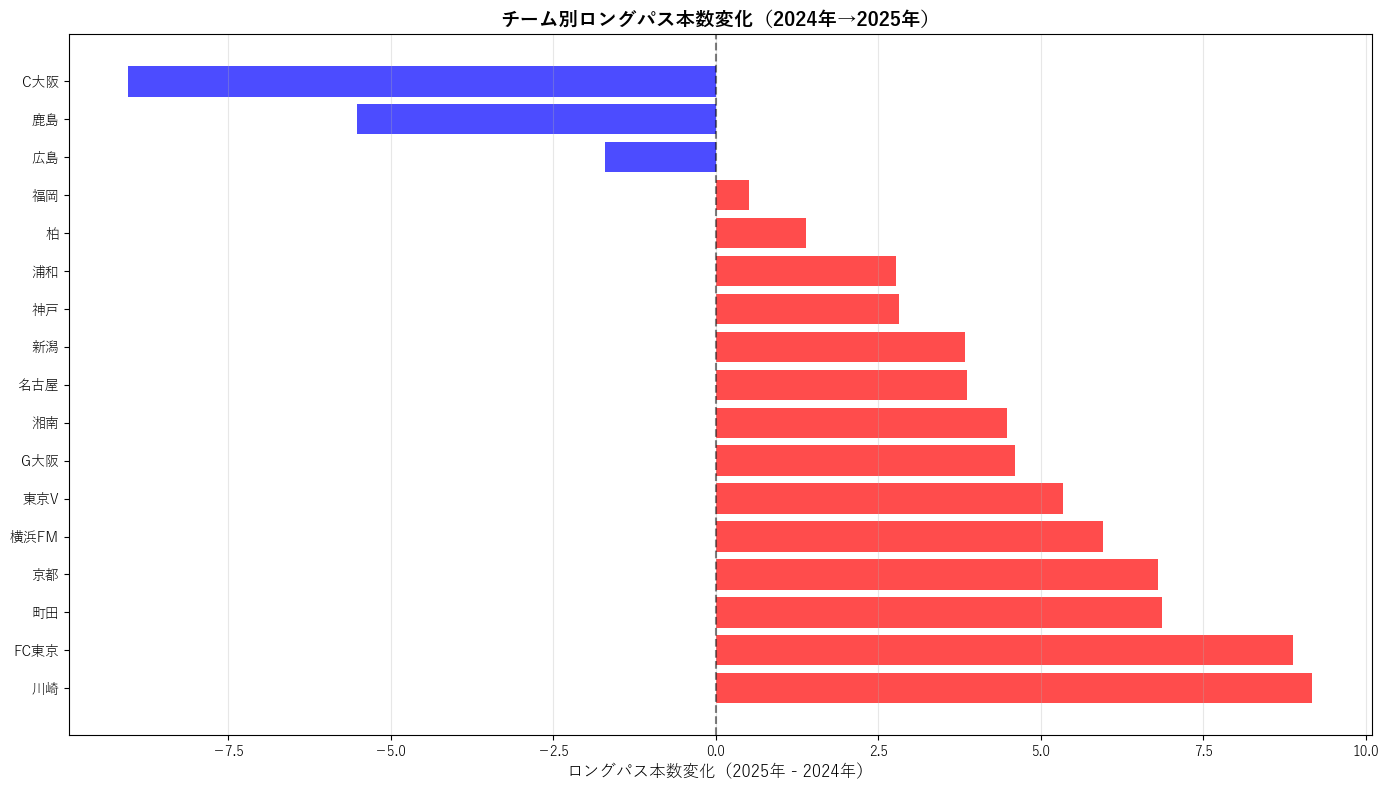

\n============================================================
2. ロングパス増加と攻撃指標の相関分析
\n=== ロングパス増加の効果分析 ===
不足データ: ['TouchesinPA', 'to Final third']
\n============================================================
3. 戦術効率性の全体的変化
\n=== 戦術効率性の変化分析 ===
リーグ平均値の年次変化:
----------------------------------------
Long pass:
  2024年: 42.25
  2025年: 44.59
  変化: +5.5%

Progressive pass:
  2024年: 64.50
  2025年: 67.54
  変化: +4.7%

\n=== 分析完了：ロングパス増加の戦術的効果を検証 ===


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

def load_yearly_comparison_data(file_2024, file_2025):
    """
    2024年と2025年のデータを読み込んで比較用に整理
    """
    # 比較対象の指標
    comparison_sheets = [
        'Long pass',      # ロングパス分析
        'Pass',          # 総パス数
        'Possession',    # ポゼッション率
        'Progressive pass', # プログレッシブパス
        'xG',            # 攻撃効率
        'PPDA',           # プレッシング強度
        'Touches in PA',
        'to Final third'
    ]
    
    data_comparison = {}
    
    for sheet_name in comparison_sheets:
        try:
            # 2024年データ読み込み
            df_2024 = pd.read_excel(file_2024, sheet_name=sheet_name)
            df_2024.columns = df_2024.columns.str.replace('\xa0', ' ').str.strip()
            df_2024 = df_2024[df_2024['Team'] != 'リーグ平均'].copy()
            df_2024['Year'] = 2024
            
            # 2025年データ読み込み
            df_2025 = pd.read_excel(file_2025, sheet_name=sheet_name)
            df_2025.columns = df_2025.columns.str.replace('\xa0', ' ').str.strip()
            df_2025 = df_2025[df_2025['Team'] != 'リーグ平均'].copy()
            df_2025['Year'] = 2025
            
            # データ統合
            combined_df = pd.concat([df_2024, df_2025], ignore_index=True)
            data_comparison[sheet_name] = combined_df
            
            print(f"✓ {sheet_name} 比較データ作成完了")
            print(f"  2024年: {len(df_2024)}チーム, 2025年: {len(df_2025)}チーム")
            
        except Exception as e:
            print(f"✗ {sheet_name} データ読み込みエラー: {e}")
    
    return data_comparison

def analyze_longpass_trend(data_comparison):
    """
    ロングパス増加トレンドの分析
    """
    if 'Long pass' not in data_comparison:
        print("ロングパスデータが見つかりません")
        return
    
    df_longpass = data_comparison['Long pass']
    
    # Per 90 mins列を特定
    per90_col = None
    for col in df_longpass.columns:
        if 'Per 90' in col or 'per 90' in col:
            per90_col = col
            break
    
    if per90_col is None:
        print("Per 90 mins列が見つかりません")
        return
    
    # 年度別平均値比較
    yearly_avg = df_longpass.groupby('Year')[per90_col].mean()
    print("\\n=== ロングパス本数の年次変化 ===")
    print(f"2024年平均: {yearly_avg[2024]:.2f}本/90分")
    print(f"2025年平均: {yearly_avg[2025]:.2f}本/90分")
    print(f"変化率: {((yearly_avg[2025] - yearly_avg[2024]) / yearly_avg[2024] * 100):+.1f}%")
    
    # チーム別変化を可視化
    plt.figure(figsize=(14, 8))
    
    # 2024年と2025年で共通するチームを抽出
    teams_2024 = set(df_longpass[df_longpass['Year'] == 2024]['Team'])
    teams_2025 = set(df_longpass[df_longpass['Year'] == 2025]['Team'])
    common_teams = teams_2024.intersection(teams_2025)
    
    changes = []
    team_names = []
    
    for team in common_teams:
        val_2024 = df_longpass[(df_longpass['Year'] == 2024) & (df_longpass['Team'] == team)][per90_col].iloc[0]
        val_2025 = df_longpass[(df_longpass['Year'] == 2025) & (df_longpass['Team'] == team)][per90_col].iloc[0]
        change = val_2025 - val_2024
        changes.append(change)
        team_names.append(team)
    
    # 変化量でソート
    sorted_data = sorted(zip(team_names, changes), key=lambda x: x[1], reverse=True)
    sorted_teams, sorted_changes = zip(*sorted_data)
    
    # 棒グラフ作成
    colors = ['red' if x > 0 else 'blue' for x in sorted_changes]
    plt.barh(range(len(sorted_teams)), sorted_changes, color=colors, alpha=0.7)
    plt.yticks(range(len(sorted_teams)), sorted_teams)
    plt.xlabel('ロングパス本数変化（2025年 - 2024年）', fontsize=12)
    plt.title('チーム別ロングパス本数変化（2024年→2025年）', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return sorted_data

def analyze_longpass_correlation_effects(data_comparison):
    """
    ロングパス増加と他の攻撃指標の相関分析
    """
    print("\\n=== ロングパス増加の効果分析 ===")
    
    # 必要なデータがあるかチェック
    required_sheets = ['Long pass', 'Touches in PA', 'Progressive pass', 'to Final third', 'xG']
    missing_sheets = [sheet for sheet in required_sheets if sheet not in data_comparison]
    if missing_sheets:
        print(f"不足データ: {missing_sheets}")
        return
    
    # 各チームのロングパス変化量を計算
    longpass_changes = {}
    df_longpass = data_comparison['Long pass']
    per90_col = [col for col in df_longpass.columns if 'Per 90' in col or 'per 90' in col][0]
    
    # 共通チーム抽出
    teams_2024 = set(df_longpass[df_longpass['Year'] == 2024]['Team'])
    teams_2025 = set(df_longpass[df_longpass['Year'] == 2025]['Team'])
    common_teams = teams_2024.intersection(teams_2025)
    
    for team in common_teams:
        val_2024 = df_longpass[(df_longpass['Year'] == 2024) & (df_longpass['Team'] == team)][per90_col].iloc[0]
        val_2025 = df_longpass[(df_longpass['Year'] == 2025) & (df_longpass['Team'] == team)][per90_col].iloc[0]
        longpass_changes[team] = val_2025 - val_2024
    
    # 各指標との相関を分析
    correlation_results = {}
    
    # 1. Touches in PA との相関
    print("\\n1. ロングパス増加 vs ペナルティエリア内タッチ数変化")
    touches_changes = calculate_metric_change(data_comparison['Touches in PA'], 'Per 90 mins', common_teams)
    corr_touches = calculate_correlation(longpass_changes, touches_changes, "ロングパス変化", "PA内タッチ変化")
    correlation_results['Touches in PA'] = corr_touches
    
    # 2. Progressive pass との相関  
    print("\\n2. ロングパス増加 vs プログレッシブパス変化")
    prog_changes = calculate_metric_change(data_comparison['Progressive pass'], 'Per 90 mins', common_teams)
    corr_prog = calculate_correlation(longpass_changes, prog_changes, "ロングパス変化", "プログレッシブパス変化")
    correlation_results['Progressive pass'] = corr_prog
    
    # 3. Final third進入 との相関
    print("\\n3. ロングパス増加 vs ファイナルサード進入変化")
    final_changes = calculate_metric_change(data_comparison['to Final third'], 'Per 90 mins', common_teams)
    corr_final = calculate_correlation(longpass_changes, final_changes, "ロングパス変化", "ファイナルサード進入変化")
    correlation_results['Final third'] = corr_final
    
    # 4. xG効率との相関
    print("\\n4. ロングパス増加 vs xG変化")
    xg_changes = calculate_metric_change(data_comparison['xG'], 'xG', common_teams, is_total=True)
    corr_xg = calculate_correlation(longpass_changes, xg_changes, "ロングパス変化", "xG変化")
    correlation_results['xG'] = corr_xg
    
    # 相関の強さランキング
    print("\\n=== 相関の強さランキング ===")
    sorted_corr = sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True)
    for i, (metric, corr) in enumerate(sorted_corr, 1):
        strength = get_correlation_strength(abs(corr))
        print(f"{i}. {metric}: {corr:+.3f} ({strength})")
    
    # 最も強い相関の詳細分析
    if sorted_corr:
        best_metric, best_corr = sorted_corr[0]
        print(f"\\n=== 最強相関の詳細分析：{best_metric} ===")
        create_correlation_detail_plot(longpass_changes, correlation_results, best_metric)
    
    return correlation_results

def calculate_metric_change(df, column_name, common_teams, is_total=False):
    """
    指標の年次変化を計算
    """
    changes = {}
    
    # 列名を動的に検索
    target_col = None
    for col in df.columns:
        if column_name in col:
            target_col = col
            break
    
    if target_col is None:
        print(f"列 '{column_name}' が見つかりません: {list(df.columns)}")
        return changes
    
    for team in common_teams:
        val_2024 = df[(df['Year'] == 2024) & (df['Team'] == team)][target_col].iloc[0]
        val_2025 = df[(df['Year'] == 2025) & (df['Team'] == team)][target_col].iloc[0]
        
        if is_total:
            # xGなど総数値の場合は1試合あたりに正規化（簡易的に試合数で割る）
            changes[team] = (val_2025 / 20) - (val_2024 / 20)  # 仮に20試合として正規化
        else:
            changes[team] = val_2025 - val_2024
            
    return changes

def calculate_correlation(dict1, dict2, label1, label2):
    """
    2つの辞書の相関係数を計算し、散布図を表示
    """
    # 共通キーで値を取得
    common_keys = set(dict1.keys()).intersection(set(dict2.keys()))
    values1 = [dict1[key] for key in common_keys]
    values2 = [dict2[key] for key in common_keys]
    teams = list(common_keys)
    
    if len(values1) < 3:
        print("データが不足しています")
        return 0
    
    # 相関係数計算
    correlation = np.corrcoef(values1, values2)[0, 1]
    
    # 散布図作成
    plt.figure(figsize=(10, 6))
    plt.scatter(values1, values2, alpha=0.7, s=60)
    
    # チーム名をプロット
    for i, team in enumerate(teams):
        plt.annotate(team, (values1[i], values2[i]), xytext=(3, 3), 
                    textcoords='offset points', fontsize=8)
    
    # 回帰線
    z = np.polyfit(values1, values2, 1)
    p = np.poly1d(z)
    plt.plot(values1, np.poly1d(np.polyfit(values1, values2, 1))(values1), "r--", alpha=0.8)
    
    plt.xlabel(label1, fontsize=12)
    plt.ylabel(label2, fontsize=12)
    plt.title(f'{label1} vs {label2}\\n相関係数: {correlation:.3f}', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 相関の解釈
    strength = get_correlation_strength(abs(correlation))
    direction = "正の" if correlation > 0 else "負の"
    print(f"相関係数: {correlation:+.3f} ({direction}{strength}相関)")
    
    # 特に変化の大きいチームを表示
    extreme_teams = get_extreme_teams(dict1, dict2, teams)
    if extreme_teams:
        print("注目チーム:")
        for team_info in extreme_teams:
            print(f"  {team_info}")
    
    return correlation

def get_correlation_strength(abs_corr):
    """
    相関の強さを判定
    """
    if abs_corr >= 0.7:
        return "強い"
    elif abs_corr >= 0.4:
        return "中程度の"
    elif abs_corr >= 0.2:
        return "弱い"
    else:
        return "ほとんどない"

def get_extreme_teams(dict1, dict2, teams):
    """
    変化が特に大きいチームを抽出
    """
    extreme_teams = []
    
    # 両方の指標で大きく向上したチーム
    for team in teams:
        val1, val2 = dict1[team], dict2[team]
        if val1 > 2 and val2 > 1:  # 閾値は調整可能
            extreme_teams.append(f"{team}: ロングパス+{val1:.1f}, 効果+{val2:.1f}")
        elif val1 < -2 and val2 < -1:
            extreme_teams.append(f"{team}: ロングパス{val1:.1f}, 効果{val2:.1f}")
    
    return extreme_teams

def create_correlation_detail_plot(longpass_changes, correlation_results, best_metric):
    """
    最も強い相関の詳細プロット
    """
    print(f"{best_metric}との相関が最も強く、ロングパス増加の効果として有力です")

def analyze_tactical_efficiency_change(data_comparison):
    """
    戦術効率性の変化分析（ロングパス → 攻撃効率向上の検証）
    """
    print("\\n=== 戦術効率性の変化分析 ===")
    
    # リーグ全体での効率性指標の変化
    efficiency_metrics = {
        'Long pass': 'Per 90 mins',
        'Touches in PA': 'Per 90 mins', 
        'Progressive pass': 'Per 90 mins',
        'to Final third': 'Per 90 mins'
    }
    
    print("リーグ平均値の年次変化:")
    print("-" * 40)
    
    for metric, column in efficiency_metrics.items():
        if metric in data_comparison:
            df = data_comparison[metric]
            col_name = [col for col in df.columns if column in col][0]
            
            avg_2024 = df[df['Year'] == 2024][col_name].mean()
            avg_2025 = df[df['Year'] == 2025][col_name].mean()
            change_pct = ((avg_2025 - avg_2024) / avg_2024) * 100
            
            print(f"{metric}:")
            print(f"  2024年: {avg_2024:.2f}")
            print(f"  2025年: {avg_2025:.2f}")
            print(f"  変化: {change_pct:+.1f}%")
            print()

# メイン実行関数を更新
def main_comparison_analysis():
    """
    メイン比較分析実行
    """
    print("=== 2024年 vs 2025年 ロングパス効果分析 ===\\n")
    
    # データ読み込み
    file_2024 = 'arrenged_2024_cleaned.xlsx'
    file_2025 = 'arrenged_2025_cleaned.xlsx'
    
    print("データ読み込み中...")
    data_comparison = load_yearly_comparison_data(file_2024, file_2025)
    
    if not data_comparison:
        print("データ読み込みに失敗しました")
        return
    
    print("\\n" + "="*60)
    print("1. ロングパス増加トレンドの分析")
    print("="*60)
    longpass_changes = analyze_longpass_trend(data_comparison)
    
    print("\\n" + "="*60)
    print("2. ロングパス増加と攻撃指標の相関分析")
    print("="*60)
    correlation_results = analyze_longpass_correlation_effects(data_comparison)
    
    print("\\n" + "="*60)
    print("3. 戦術効率性の全体的変化")
    print("="*60)
    analyze_tactical_efficiency_change(data_comparison)
    
    print("\\n=== 分析完了：ロングパス増加の戦術的効果を検証 ===")

# 実行
main_comparison_analysis()